In [1]:


# maths library for matrix manipulation
import numpy as np

# matplotlib is a library for plotting things inside Python
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This is a library for reading and writing image files

from skimage import io

In [3]:
# a library for finding files


import glob 

In [4]:
JPGList = glob.glob('../ImageData/all cards/*.jpg')


PNGList = glob.glob('../ImageData/all cards/*.png')

In [5]:
len(JPGList)

202

In [6]:
allList = JPGList + PNGList

In [7]:
# allList is the list of all image file names

len(allList)

287

In [8]:
allList[130]   

'../ImageData/all cards/48.jpg'

In [9]:
io.imread(    allList[130]     ) 

array([[[187, 180, 152],
        [189, 181, 162],
        [142, 130, 118],
        ...,
        [138, 129, 124],
        [100,  95,  92],
        [ 27,  27,  29]],

       [[191, 181, 156],
        [156, 145, 127],
        [149, 137, 125],
        ...,
        [142, 131, 127],
        [ 55,  50,  47],
        [ 20,  20,  22]],

       [[166, 154, 130],
        [159, 146, 130],
        [160, 146, 135],
        ...,
        [150, 139, 133],
        [ 71,  66,  63],
        [ 44,  44,  46]],

       ...,

       [[187, 171, 155],
        [214, 198, 182],
        [210, 197, 180],
        ...,
        [105,  97,  86],
        [116, 109,  99],
        [184, 177, 169]],

       [[201, 185, 169],
        [193, 177, 161],
        [205, 190, 171],
        ...,
        [ 96,  87,  78],
        [141, 134, 126],
        [193, 186, 180]],

       [[204, 187, 171],
        [193, 178, 159],
        [206, 191, 172],
        ...,
        [113, 103, 101],
        [173, 165, 163],
        [198, 189, 190]]

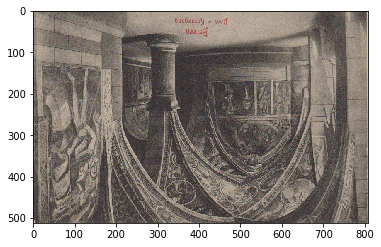

In [10]:
plt.imshow(     io.imread(    allList[130]     )     ) 

In [11]:
Im = io.imread( allList[130] )

In [12]:
from skimage import feature

In [13]:
from skimage import transform

In [14]:
Imr = transform.resize(Im,(256,256))

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [15]:
F = feature.hog(Imr,  pixels_per_cell=(16,16)  )

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [16]:
import tqdm

In [17]:
imageFeatures = []
for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    imr = transform.resize(im,(256,256))
    F = feature.hog(imr,  pixels_per_cell=(16,16)  )
    imageFeatures.append(F)
    

  0%|          | 0/287 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
100%|██████████| 287/287 [00:15<00:00, 18.57it/s]


In [18]:
imf = np.asarray(imageFeatures)

In [19]:
np.shape(imf)

(287, 15876)

In [20]:
from sklearn import manifold

In [21]:
xy = manifold.TSNE(n_components=2).fit_transform(imf)

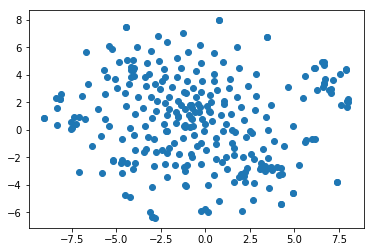

In [22]:
plt.scatter(xy[:,0],xy[:,1])

In [23]:
np.shape(xy)

(287, 2)

In [24]:
xy[:,1]

array([-6.00316405e-01, -7.94239402e-01, -4.72682667e+00,  3.15416312e+00,
        4.94370270e+00, -1.09557115e-01,  9.44425225e-01, -3.44097543e+00,
        1.69507945e+00,  4.41449594e+00,  4.27350998e+00, -4.24774456e+00,
        1.48467684e+00,  4.36751890e+00,  2.04668188e+00,  4.26331460e-01,
       -3.58776510e-01,  3.53286433e+00,  2.69263148e-01, -1.30683744e+00,
        3.05998898e+00,  1.57768154e+00,  4.49381113e+00,  7.96637177e-01,
        3.12388992e+00, -3.05709529e+00,  3.81348252e+00,  2.42975831e+00,
        7.71499157e-01, -6.35348797e+00, -3.12368083e+00,  6.07602692e+00,
        6.18823957e+00, -5.38191652e+00,  4.47339869e+00,  6.77637959e+00,
        3.65352082e+00,  2.10235095e+00,  2.49754405e+00, -1.86327040e+00,
       -3.30993009e+00,  2.12998176e+00,  3.00800234e-01, -3.41707826e+00,
        1.08731735e+00, -2.40173411e+00,  4.94229984e+00,  6.76097965e+00,
        2.24518895e+00,  8.32510471e-01, -2.43316722e+00, -2.00497532e+00,
        3.93362260e+00, -

In [25]:
myCanvas = np.zeros(( 5000,5000,3  ))

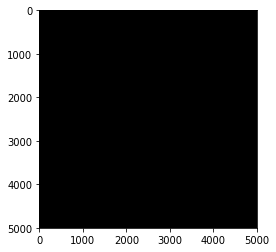

In [26]:
plt.imshow(myCanvas)

In [27]:
x = xy[:,0].copy()
y = xy[:,1].copy()

# normalise the x values to be between -1 and +1:
x *= (1/np.max(  abs(x)   )) 
# shift them so they are between 0 and 2
x += 1
x *= 2300

y *= (1/np.max(  abs(y)   )) 
y += 1
y *= 2300

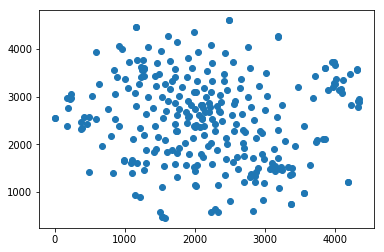

In [28]:
plt.scatter(x,y)

In [29]:
for i in tqdm.tqdm(range ( len ( allList ))):
    px = int(x[i])
    py = int(y[i])
    
    imr = transform.resize( io.imread( allList[i] ) , (128,128,3))
    myCanvas[px:px+128,py:py+128] = imr

  0%|          | 0/287 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 287/287 [00:05<00:00, 51.11it/s]


In [30]:
io.imsave('testOutput.jpg',myCanvas)

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
